In [1]:
import pandas as pd #판다스
import numpy as np #넘파이
import seaborn as sns #씨본
import re #정규식
import matplotlib
import matplotlib.pyplot as plt #시각화
%matplotlib inline

#워드클라우드관련
from collections import Counter
from collections import OrderedDict
from konlpy.tag import Okt
from wordcloud import WordCloud
okt = Okt()

/opt/app-root/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [2]:
# 참고 : https://blog.naver.com/sisomimoctrl/222793631920

# 한국어 폰트를 위한 설정 !
# 한글폰트 파일을 업로드 주피터노트북에 미리 업로드 해놓고 불러오기 

from matplotlib import font_manager

# 맑은고딕
font_fname = 'fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname = font_fname).get_name()
plt.rcParams['font.family'] = font_family

# 데이터전처리

In [3]:
# 연수구 민원현황(2014~2022)

# 데이터 불러오기

from geoband.API import *
GetCompasData('SBJ_2208_001', '9', '9_연수구_민원현황_격자매핑.xlsx')

[2022-09-30 16:36:42] 성공 - 9_연수구_민원현황_격자매핑.xlsx


'9_연수구_민원현황_격자매핑.xlsx'

In [4]:
# 민원현황 : Civil complaint status
# 엑셀파일 변수명 ( Complaint로 지정 )

Complaint = pd.read_excel('9_연수구_민원현황_격자매핑.xlsx')

In [5]:
# 결측치 제거

Complaint.dropna(inplace = True)
Complaint.reset_index(inplace = True)
Complaint.drop('index', axis = 1 , inplace = True)

In [6]:
Complaint.head()

apply_date     compl_contents       gid
0      201201         점심시간의 민원행정  다사249365
1      201201  찬성.반대 동의율 적용기준 문의  다사242368
2      201201        도로변 벤치 수리요망  다사241368
3      201201   주차공간을 확보해 주세요...  다사241368
4      201201    건축허가 심의기준과 불법민원  다사250364

In [7]:
# 복사 : 원본 데이터 훼손 방지

Complaint2 = Complaint.copy()
Complaint2.head()

apply_date     compl_contents       gid
0      201201         점심시간의 민원행정  다사249365
1      201201  찬성.반대 동의율 적용기준 문의  다사242368
2      201201        도로변 벤치 수리요망  다사241368
3      201201   주차공간을 확보해 주세요...  다사241368
4      201201    건축허가 심의기준과 불법민원  다사250364

In [8]:
Complaint2['compl_contents'] = Complaint2['compl_contents'].astype('str')

In [9]:
# 고충민원 전체 data 합침 : Complaint_text
# join 이용 : ' ' 띄어쓰기로 !

Complaint_text = ' '.join(Complaint2['compl_contents'])
Complaint_text

'점심시간의 민원행정 찬성.반대 동의율 적용기준 문의 도로변 벤치 수리요망 주차공간을 확보해 주세요... 건축허가 심의기준과 불법민원 통행불편 30년전 이혼한 어머님에 대한 부양의무 송도유원지 공사로 횡단보도를 건널수가 없어요. 주택법시행령 별표9  관리주체의 행정처분에 대하여 버스무정차 통과 주택법 관련 질의 중고차 수출단지 불법주정차 위험 꽃길 인천  개인택시 운전개기사 꼭 처벌해 주세요 방치차량 저상버스 경사로 작동 또 안되네요. 인천송도 해안도로 벗꽃길 조성 무엇을 하는 곳인지 알아봐 주실 수 있나요? 청학도서관 내 자전거주차시설 주민센터내 소음발생 건 버스무정차 도로 보수공사 부탁해요... 폐 현수막 동대표회의 회의비 참석 수당건 깨진도로 보수 도로보수공사 능허대공원 연수구 옥련동 쌍용아파트 앞 사거리 무한나라앞 불법 주차 단속해주세요. 옥련동 쌍용아파트 앞 음식점"무한나라"앞에 차량 차단용 블럭 설치해주세요!! 업무처리 및 직원불친절 노점상 단속 부탁드립니다. 청량산 불법 현수막 철거해 주세요 아파트안에서 문학산계단 줄 8번 저상버스 경사로가 작동 안 됩니다. 버스 무정차 통과  녹지 정비 65-1번 버스 정류장을 그냥 지나쳐가네요 입주자대표회의 감사 선출에 관한 질의 헬스장 시설물 보수및 크기 불만 개인택시 영수증발급 거부 버스불편신고  이행강제금  부과  이의신청 능허대공원 송도역 활성화를위한 제안 도로변 벤치 공원내 체육시설 고쳐주세요 지저분한 쓰레기봉투 도로파손 보수공사 제주본가&#50582;회단보도옆 도로파손 제주본가 건너편 도로파손 옥련동  새싹공원 어린이집 사고 인천 캣맘 살인미수 사건에 대하여 버스불편 무정차통과 버스무정차  조합원 분양에 대하여 다음의 내용을 질의 드립니다 조합원 분양 관련 궁금사항 마을버스 523번  운행관련 개선요구 2012년 8월 18일 9시 23분께에 옥련동 현대3차아파트 버스정류장에서 승차거부 및 신호 위반 버스를 신고합니다.  4거리에서 신호등을 건너 정차하여잇는 버스를 횡단보도 불법주차는 근절되어야 한다.

In [10]:
# 민원 데이터 텍스트 파일로 저장 : '민원현황_text_data.txt'

with open('민원현황_text.txt', 'w', encoding='utf8') as f:
    f.write(Complaint_text)

In [11]:
# 민원 텍스트 데이터 파일 불러오기 : Grievance_text2

f = open('민원현황_text.txt', 'r', encoding='utf8')

Complaint_text2 = f.read()
Complaint_text2

'점심시간의 민원행정 찬성.반대 동의율 적용기준 문의 도로변 벤치 수리요망 주차공간을 확보해 주세요... 건축허가 심의기준과 불법민원 통행불편 30년전 이혼한 어머님에 대한 부양의무 송도유원지 공사로 횡단보도를 건널수가 없어요. 주택법시행령 별표9  관리주체의 행정처분에 대하여 버스무정차 통과 주택법 관련 질의 중고차 수출단지 불법주정차 위험 꽃길 인천  개인택시 운전개기사 꼭 처벌해 주세요 방치차량 저상버스 경사로 작동 또 안되네요. 인천송도 해안도로 벗꽃길 조성 무엇을 하는 곳인지 알아봐 주실 수 있나요? 청학도서관 내 자전거주차시설 주민센터내 소음발생 건 버스무정차 도로 보수공사 부탁해요... 폐 현수막 동대표회의 회의비 참석 수당건 깨진도로 보수 도로보수공사 능허대공원 연수구 옥련동 쌍용아파트 앞 사거리 무한나라앞 불법 주차 단속해주세요. 옥련동 쌍용아파트 앞 음식점"무한나라"앞에 차량 차단용 블럭 설치해주세요!! 업무처리 및 직원불친절 노점상 단속 부탁드립니다. 청량산 불법 현수막 철거해 주세요 아파트안에서 문학산계단 줄 8번 저상버스 경사로가 작동 안 됩니다. 버스 무정차 통과  녹지 정비 65-1번 버스 정류장을 그냥 지나쳐가네요 입주자대표회의 감사 선출에 관한 질의 헬스장 시설물 보수및 크기 불만 개인택시 영수증발급 거부 버스불편신고  이행강제금  부과  이의신청 능허대공원 송도역 활성화를위한 제안 도로변 벤치 공원내 체육시설 고쳐주세요 지저분한 쓰레기봉투 도로파손 보수공사 제주본가&#50582;회단보도옆 도로파손 제주본가 건너편 도로파손 옥련동  새싹공원 어린이집 사고 인천 캣맘 살인미수 사건에 대하여 버스불편 무정차통과 버스무정차  조합원 분양에 대하여 다음의 내용을 질의 드립니다 조합원 분양 관련 궁금사항 마을버스 523번  운행관련 개선요구 2012년 8월 18일 9시 23분께에 옥련동 현대3차아파트 버스정류장에서 승차거부 및 신호 위반 버스를 신고합니다.  4거리에서 신호등을 건너 정차하여잇는 버스를 횡단보도 불법주차는 근절되어야 한다.

# 단어 counting

In [12]:
## 단어 개수를 counting 해주는 함수 : wordcount(file1, file2)

def wordcount(file1, file2):
    
    # file1 : counting 할 text 파일
    # file2 : counting 후, 저장할 text 파일이름
    
    f = open(file1, 'r', encoding='utf8')
    g = open(file2, 'w', encoding='utf8')
    
    print("파일 가져오기 완료")
    
    engine = Okt()
    
    # counting 할 데이터 읽어오기
    data = f.read()
    
    # text 중에서 ',', '/' 등 불필요한 기호 부분 없애기
    data = re.sub('[^\s\w]', ' ', data)
    data = re.sub('\s+', ' ', data)

    # text 중에서 관련없는 단어 삭제를 위한 stopwords_list 설정
    stopwords_list = ['주세요', '제보', '합니다', '고발', '질문', '드립니다', '부탁', '해요', '한다', '했습니다', '관하여', '불법', 
                         '신문고', '도와주세요', '싶습니다', '알고', '요청', '요', '신고', '?', '!', '것', '필요', '입니다', 
                          '바랍니다', '안전', '구역', '기타', '인천', '민원', '보호', '의견','못', '전용', '연수구', '신문']

    # 삭제할 단어를 replace를 이용하여 '' 로 변경
    for i in range(len(stopwords_list)):
        data = data.replace(stopwords_list[i], '')

    # 불필요하게 생성된 공백 제거
    data = " ".join(data.split())
    
    print("text 정제 완료")
    print("단어 카운팅 하는 중 ...")
        
    # 글자수 1개 이상 단어 추출
    all_nouns = engine.nouns(data)
    nouns = [n for n in all_nouns if len(n) > 1]
    
    # 다른 함수에서도 함께 사용하기 위한 global 변수
    global count, by_num
    
    # counting 하기
    count = Counter(nouns)
    
    # 정렬하기 (내림차순)
    by_num = OrderedDict(sorted(count.items(),
                                key=lambda t: t[1],
                                reverse=True))
    
    word = [i for i in by_num.keys()]
    number = [i for i in by_num.values()]
    
    # 하나의 파일로 합치고 file2 이름으로 저장
    for w, n in zip(word, number):
        final1 = '%s %d' % (w, n)
        g.write(final1 + '\n')
    
    # 정상 실행되었는 지 확인
    print("- 단어 카운팅이 완료되었습니다. ('민원현황_count.txt') \n")

    # 사용한 파일 닫기
    f.close()
    g.close()

In [13]:
# file1 : counting 할 text 파일
# file2 : counting 후, 저장할 text 파일이름

file1 = '민원현황_text.txt'
file2 = '민원현황_count.txt'

wordcount(file1, file2)

파일 가져오기 완료
text 정제 완료
단어 카운팅 하는 중 ...
- 단어 카운팅이 완료되었습니다. ('민원현황_count.txt') 



# Top 10

In [14]:
## 빈출 단어를 추출해주는 함수 : top_n(file3)

def top_n(file3):
    print("빈출단어 TOP 10 추출 중 ...")
    
    #  file3 : Top 10 값을 저장할 파일명 : '민원현황_Top10.txt'
    f = open(file3, 'w', encoding='utf8')
    
    # count 값 중, Top 10 뽑아내기
    # count 변수는 wordcount(file1, file2)에서 생성
    rank = count.most_common(10)
    
    # 후에 다른 함수에서 사용하기 위함
    global top
    
    # Top 10 을 딕셔너리 형태로 저장
    top = dict(rank)
    
    word = [i for i in top.keys()]
    number = [i for i in top.values()]
    
    # Top10 파일로 저장
    for w, n in zip(word, number):
        final2 = '%s %d' % (w, n)
        f.write(final2 + '\n')
    
    # 정상 실행되었는 지 확인
    print("- 최다 빈출 단어 10개가 저장 되었습니다. ('민원현황_Top10.txt') \n")
    
    # 파일 닫기
    f.close()

In [15]:
file3 = '민원현황_Top10.txt'

top_n(file3)

빈출단어 TOP 10 추출 중 ...
- 최다 빈출 단어 10개가 저장 되었습니다. ('민원현황_Top10.txt') 



# Top10 막대그래프

In [16]:
# 빈출단어 Top10을 막대그래프로 확인하는 함수 : topn_bar(top)
def topn_bar(top):
    print("Top10 그래프 생성하는 중 ...")
    
    # 막대그래프를 그리기위한 설정
    
    fig = plt.gcf()
    
    # 도화지 size
    fig.set_size_inches(10, 8)
    
    # 제목
    plt.title("민원현황 빈출단어 TOP 10", fontsize = 15)
    
    # x축
    plt.xlabel("민원현황 단어", fontsize = 10)
    
    # y축
    plt.ylabel("단어의 개수", fontsize = 10)
    
    # 세부 값 설정 (color)
    plt.bar(top.keys(), top.values(), color='#FFA7A7')
    
    # png로 저장 : 민원현황_Top10_Bargraph.png
    # bbox_inches = 'tight' : 알 수 없는 오류에 의해 그래프가 잘리는 것을 방지
    plt.savefig("민원현황_Top10_Bargraph.png", bbox_inches = 'tight')
    
    # 보여주기
    plt.show()
    
    print("- '민원현황_Top10_Bargraph.png' 가 저장 되었습니다.\n")

Top10 그래프 생성하는 중 ...


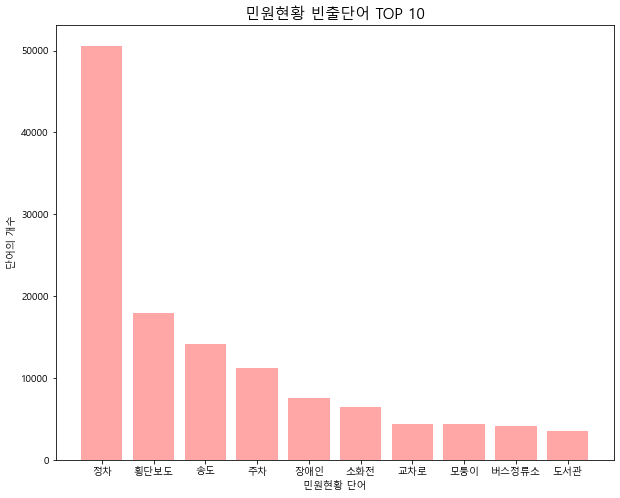

- '민원현황_Top10_Bargraph.png' 가 저장 되었습니다.



In [17]:
# 막대그래프 생성 함수 실행
# top 변수 : top_n(file3) 함수 에서 global로 지정

topn_bar(top)

# 워드클라우드

In [18]:
# 워드클라우드 생성 함수
def Complaint_wordcloud(filename):

    # 워드클라우드를 생성할 파일 불러오기
    with open(filename, encoding='utf8') as f:
        data = f.read()
        
        print("파일 가져오기 완료")
    
        # text 중에서 ',', '/' 등 불필요한 기호 부분 없애기
        data = re.sub('[^\s\w]', ' ', data)
        data = re.sub('\s+', ' ', data)

        # text 중에서 관련없는 단어 삭제를 위한 stopwords_list 설정
        stopwords_list = ['주세요', '제보', '합니다', '고발', '질문', '드립니다', '부탁', '해요', '한다', '했습니다', '관하여', '불법', 
                         '신문고', '도와주세요', '싶습니다', '알고', '요청', '요', '신고', '?', '!', '것', '필요', '입니다', 
                          '바랍니다', '안전', '구역', '기타', '인천', '민원', '보호', '의견','못', '전용', '연수구', '신문']

        # 삭제할 단어를 replace를 이용하여 '' 로 변경
        for i in range(len(stopwords_list)):
            data = data.replace(stopwords_list[i], '')

        # 불필요하게 생성된 공백 제거
        data = " ".join(data.split())

        # text 파일 정제하기
        engine = Okt()
        all_nouns = engine.nouns(data)
        nouns = [n for n in all_nouns if len(n) > 1]
        
        print("text 정제 완료")
        
        # 개수 count
        count = Counter(nouns)

        tags = count.most_common(100)
        
        # 랜덤 함수
        import random as r
        
        print("워드 클라우드 생성하는 중 ..")
        
        # 워드클라우드 생성 : 세부값 설정        
        wc = WordCloud(font_path = font_fname, # font가 있는 위치
                       # background_color = (r.randint(0,255),r.randint(0,255), r.randint(0,255)), # 랜덤으로 색상 설정
                       # background_color = ('241, 105, 158'), # 임의로 색상 설정해보기
                       background_color = ('white'), # 색상이름으로 설정해보기
                       width = 3000, # 크기설정
                       height = 2000)
        
        cloud = wc.generate_from_frequencies(dict(tags))
        
        # 이미지로 보여주기
        plt.imshow(cloud, interpolation='bilinear')
        plt.axis('off')
        
        # 이미지파일로 저장 : 고충민원_wordscloud.png
        # 원하는 위치에 저장하려면 경로 설정 ! : graphs/고충민원_wordscloud.png
        fig_name = f'{filename}_wordclouds.png'
        plt.savefig(fig_name)
        plt.show()
    
    # 함수 실행 확인
    print(f'- {filename}의 워드 클라우드가 저장되었습니다.')

## 전체(2012~2022) 워드클라우드

파일 가져오기 완료
text 정제 완료
워드 클라우드 생성하는 중 ..


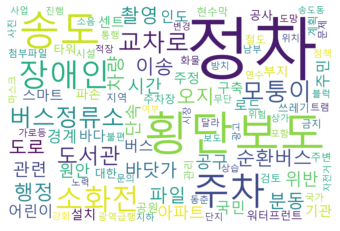

- 민원현황_text.txt의 워드 클라우드가 저장되었습니다.


In [19]:
# 정제된 text 파일
# 민원현황 완료 text : '민원현황_text_data.txt'
filename = '민원현황_text.txt'

# 함수 실행
Complaint_wordcloud(filename)